In [3]:
import numpy as np
import random
import timeit
import copy
import matplotlib.pyplot as plt

# Insertion Sort

In [26]:
'''
Insertion Sort
Reference : https://www.geeksforgeeks.org/insertion-sort/
'''
def InsertionSort(ary, n):
    
    for i in range(1, n):
        curr = ary[i]
        j = i - 1

        while j >= 0 and curr < ary[j]:
            ary[j + 1] = ary[j]
            j -= 1
        
        ary[j + 1] = curr
    
    return ary

# Merge Sort

In [27]:
'''
Merge Function
'''
def merge(res,left, right):
    i,j,k = 0, 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            res[k] = left[i]
            i += 1
        else:
            res[k] = right[j]
            j += 1
        
        k += 1
    
    #Add in Remaining Elements
    while i < len(left):
        res[k] = left[i]
        i += 1
        k += 1

    while j < len(right):
        res[k] = right[j]
        j += 1
        k += 1
    
    return res

'''
Merge Sort
Reference : 
'''
def MergeSort(ary):
    if len(ary) <= 1:
        return ary

    med = len(ary) // 2
    ary1 = ary[:med]
    ary2 = ary[med:]

    ary1 = MergeSort(ary1)
    ary2 = MergeSort(ary2)

    return merge(ary, ary1, ary2)

# TimsSort

Tims Sort is a hybrid of MergeSort and Insertion

In [28]:
def TimSort(ary, k):
    if len(ary) <= 1:
        return ary

    if len(ary) <= k:
        return InsertionSort(ary , len(ary))

    med = len(ary) // 2
    ary1 = ary[:med]
    ary2 = ary[med:]

    ary1 = TimSort(ary1, k)
    ary2 = TimSort(ary2, k)

    return merge(ary, ary1, ary2)

# Test Code

- Used to Generate the Arrays we will be sorting with

## GenerateRandomArray
- Generate a random array using Python Random Module

## GenerateNearlySorted
- Generate a nearly sorted array

## GenerateReverseArray
- Generate an array sorted in reverse order

In [29]:
'''
Generate A Random Array of Size n
'''
def GenerateRandomArray(n):
    return random.sample(range(n), n)


'''
Generate Nearly Sorted Array
'''
def GenerateNearlySorted(n):
    res = GenerateRandomArray(n)
    res.sort()
    #Randomize one of the values
    rand_index = random.randint(0, n - 1)
    res[rand_index] = res[rand_index] + random.randint(21, 100)

    return res

'''
Generate a Reverse Order Array
'''
def GenerateReverseArray(n):
    res = GenerateRandomArray(n)
    res.sort(reverse=True)
    return res

# Comparing Tims, Merge, and Insertion Sort

We are going to use the same partition point as problem 1 where n~50. We are going to compare this to the speed of merge sort and insertion sort.

In [43]:
def RunTest(gen):
    insertionX = []
    insertionY = []

    timsX = []
    timsY = []

    mergeX = []
    mergeY = []

    if gen == 1:
        label = "Sort Times Using Random Array Values"
    
    if gen == 2:
        label = "Sort Times Using Nearly Sorted Array Values"

    if gen == 3:
        label = "Sort Times Using Reverse Order Values"

    for size in range(500, 50, -10):
        # Copy the Array

        if (gen == 1):
            x = GenerateRandomArray(size)
        
        if (gen == 2):
            x = GenerateNearlySorted(size)

        if (gen == 3):
            x = GenerateReverseArray(size)


        mergeCopy = copy.deepcopy(x)
        insertionCopy = copy.deepcopy(x)
        timsCopy = copy.deepcopy(x)

        mergeX.append(size)
        insertionX.append(size)
        timsX.append(size)

        # Run Merge Sort
        starttime = timeit.default_timer()
        res = MergeSort(mergeCopy)
        endtime = timeit.default_timer() - starttime
        mergeY.append(endtime)

        # Run Insertion Sort

        starttime = timeit.default_timer()
        InsertionSort(insertionCopy, len(insertionCopy))
        endtime = timeit.default_timer() - starttime
        insertionY.append(endtime)

        #Run Tims Sort
        k = 50
        starttime = timeit.default_timer()
        res = TimSort(timsCopy, k) #Figure out a value of K
        endtime = timeit.default_timer() - starttime
        timsY.append(endtime)
 
    plt.plot(insertionX,insertionY)
    plt.plot(mergeX, mergeY)
    plt.plot(timsX, timsY)

    plt.legend(["Insertion Sort", "Merge Sort", "TimSort"], loc="upper left")
    plt.xlabel("Input Array Size")
    plt.ylabel("Time (seconds)")
    plt.title(label)

    plt.show()

### Random Array Values

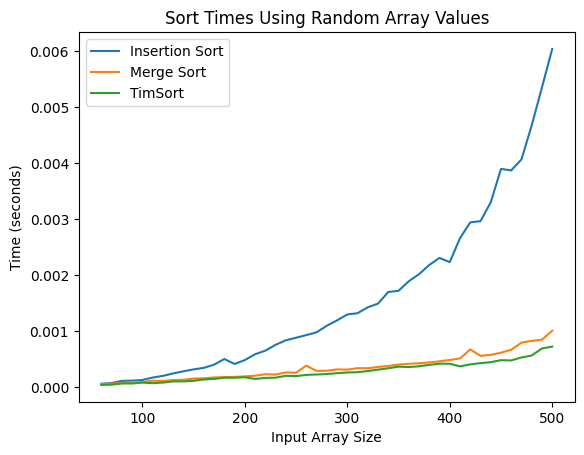

In [44]:
RunTest(1)

### Nearly Sorted Array

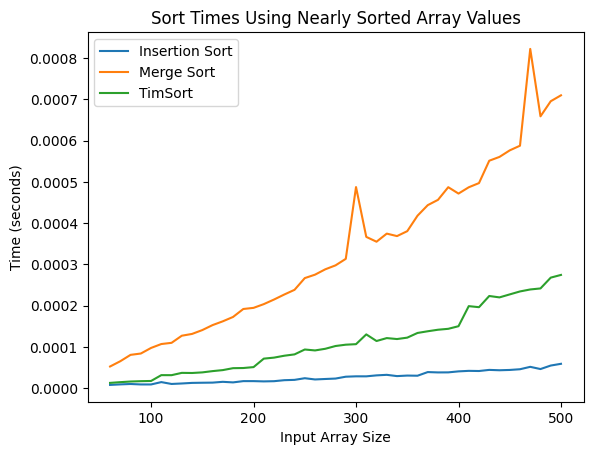

In [45]:
RunTest(2)

### Reverse Order Array

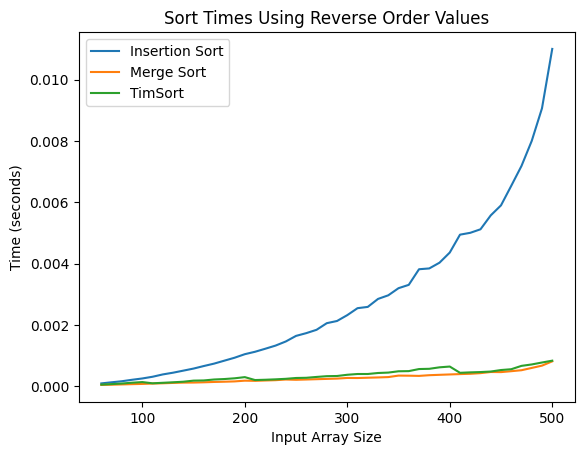

In [46]:
RunTest(3)

## Finding an Efficient Value of K for TimsSort

Is the tims sort optimal value different than the insertion sort value? Lets determine this with an experiment

We are going to use 3 different values of n, and testing different values of k.

We will use size n = 50, 100, 150 for our three tests.

In [80]:
def RedefinedTest(size):

    timsX = []
    timsY = []

    label = "Sort Times Using Random Array Values"
    
    repititions = 100

    x = GenerateRandomArray(size)

    breakpoint = None
    #Run Tims Sort
    for k in range(size, 1, -1):
        timsX.append(k)
        timsAvg = 0
        for _ in range(repititions):
            timsCopy = copy.deepcopy(x)
            starttime = timeit.default_timer()
            res = TimSort(timsCopy, k) #Figure out a value of K
            endtime = timeit.default_timer() - starttime
            timsAvg += endtime
        
        timsY.append(timsAvg /  repititions)
        if not breakpoint:
            breakpoint = (timsX[-1], timsY[-1])

        elif timsY[-1] < breakpoint[1]:
            breakpoint = (timsX[-1], timsY[-1])


    plt.plot(timsX, timsY)
    if (breakpoint is not None):
        plt.plot(breakpoint[0], breakpoint[1], 'bo')
        plt.annotate(f'({breakpoint[0]}, {breakpoint[1]})',xy=(breakpoint[0], breakpoint[1]))
    plt.legend(["Tims Sort"], loc="upper left")
    plt.xlabel("K value")
    plt.ylabel("Time (Seconds)")
    plt.title(label)

    plt.show()

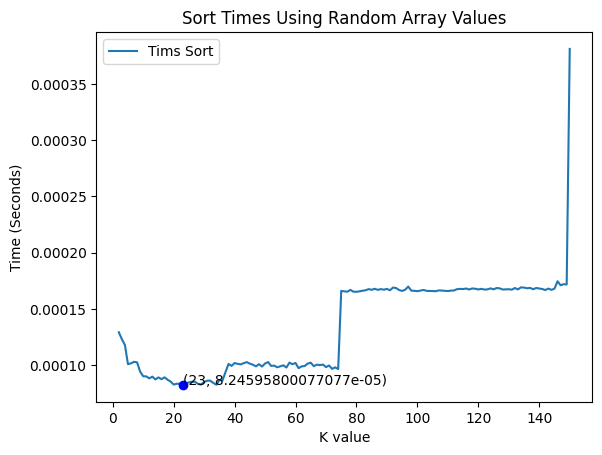

In [84]:
RedefinedTest(150)

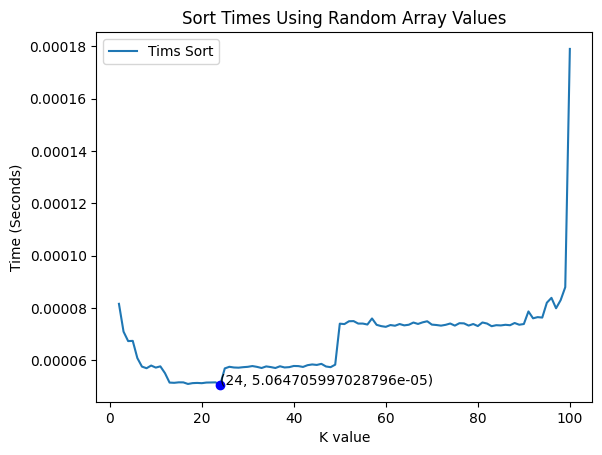

In [82]:
RedefinedTest(100)

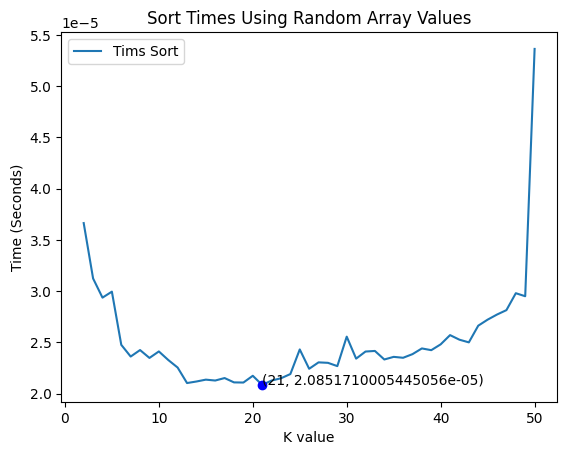

In [83]:
RedefinedTest(50)